# Programación Python para Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 10
<p>Modelos de ensemble.</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
from pandas import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

# Seleccion de caracteristicas
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline

# Metricas
from sklearn.metrics import mean_squared_error

# Calculo de modelos
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')

Selecciona dos conjuntos de datos de los múltiples repositorios existentes, uno correspondiente a un problema de clasificación y otro de regresión y realiza los siguientes apartados:
- Para cada problema, realiza una comparativa del rendimiento de:
    - Un modelo base.
    - Una estrategia de bagging con el modelo base.
    - Una estrategia de boosting con el modelo base.


***Fuente:*** <br>
*https://archive-beta.ics.uci.edu/ml/datasets/car+evaluation*<br>
*https://archive-beta.ics.uci.edu/ml/datasets/auto+mpg*

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

<div style="font-size:14px; text-align:center"><b>Clasificación</b><br></div>

Para este apartado, se va a realizar la serie de apartados con un modelo base del tipo DecisionTree.

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


,Class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


,buying,maint,doors,persons,lug_boot,safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


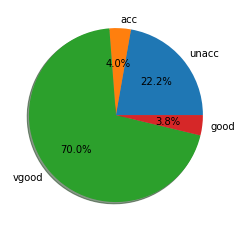

In [3]:
# Carga del dataset
column_names=['buying','maint','doors','persons','lug_boot','safety','Class']
df=pd.read_csv('car.data', sep=',', names=column_names)

# Separación en datos de entrada y salida del dataframe
X=df[df.columns[:-1]]
y=df[df.columns[-1:]]

# Representación de los datos
display(X, y, df.describe())

# Agrupación de la columna deseada y ver distribución de los datos
class_distribution=y.groupby('Class').size()

plt.pie(class_distribution, labels=y['Class'].unique(), autopct='%1.1f%%', shadow=True)

plt.show()

Existe un desbalanceo de los datos por lo que se deberá rebalancear los mismos para calcular el modelo.

Error minimo Test: 0.5147 con N iteraciones = 7
Error minimo Train: 0.7500 con N iteraciones = 0
Precisión Test: 0.5414
Precisión Train: 0.3704


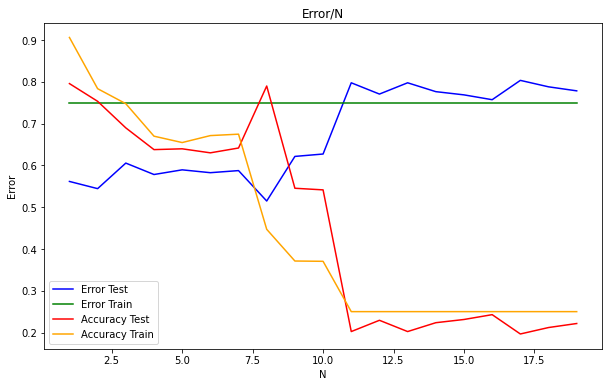

Error minimo Test: 0.3064 con N iteraciones = 18
Error minimo Train: 0.7500 con N iteraciones = 0
Precisión Test: 0.6301
Precisión Train: 0.5774


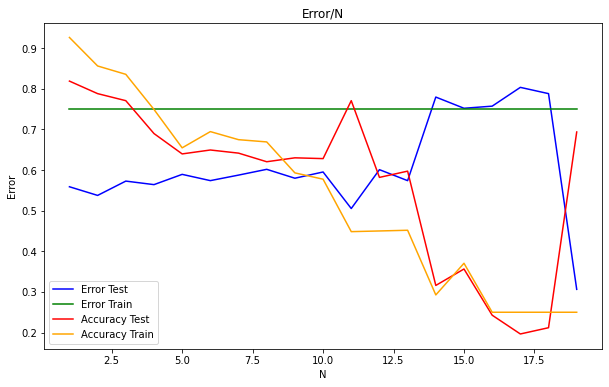

Error minimo Test: 0.2832 con N iteraciones = 10
Error minimo Train: 0.7500 con N iteraciones = 0
Precisión Test: 0.6301
Precisión Train: 0.3704


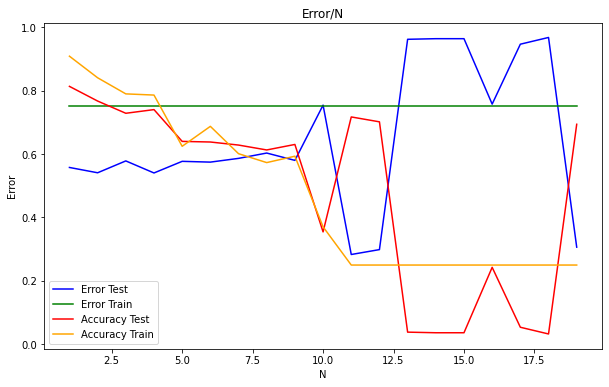

In [4]:
# Iteraciones multiples para ver la evolucion del modelo
rango=20

y_pred_test=[[],[],[]]
y_pred_train=[[],[],[]]
error_rate_test=[[],[],[]]
error_rate_train=[[],[],[]]
acc_test=[[],[],[]]
acc_train=[[],[],[]]
for i in range(1, rango):
    clear_output(wait=True)
    print(f'''Empezando iteración: {i} ...''')
    
    seed = random.randint(0,100)
    
    # Instancia de modelo base
    modelo_base=DecisionTreeClassifier(ccp_alpha=i/100)

    # Instancia del modelo ensemble Bagging
    modelo_bagging=BaggingClassifier(base_estimator=modelo_base, n_estimators=100, max_samples=0.1, random_state=seed)

    # Instancia delo modelo ensemble Boosting
    modelo_boosting=RandomForestClassifier(ccp_alpha=i/100, n_estimators=100, random_state=seed)
    
    # Separacion train y test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
    
    # Instancia de RandomOverSampler y fit_resample de los datos de Train
    ros = RandomOverSampler(random_state=seed)#sampling_strategy='minority',
    X_train, y_train = ros.fit_resample(X_train, y_train)
    
    # Agrupación de la columna deseada y ver distribución de los datos
    # class_distribution=y_train.groupby('Class').size()
    # plt.pie(class_distribution, labels=y_train['Class'].unique(), autopct='%1.1f%%', shadow=True)
    # plt.show()
    
    # PipeLine para el tratado de los modelos
    pipeline_base=Pipeline([('ohe', OneHotEncoder()),('modelo', modelo_base)])
    pipeline_bagging=Pipeline([('ohe', OneHotEncoder()),('modelo', modelo_bagging)])
    pipeline_boosting=Pipeline([('ohe', OneHotEncoder()),('modelo', modelo_boosting)])
    
    # Creación de los modelos
    pipeline_base.fit(X_train, y_train)
    pipeline_bagging.fit(X_train, y_train)
    pipeline_boosting.fit(X_train, y_train)
    
    # Predicciones de los modelos
    y_pred_test[0]=pipeline_base.predict(X_test)
    y_pred_train[0]=pipeline_base.predict(X_train)
    y_pred_test[1]=pipeline_bagging.predict(X_test)
    y_pred_train[1]=pipeline_bagging.predict(X_train)
    y_pred_test[2]=pipeline_boosting.predict(X_test)
    y_pred_train[2]=pipeline_boosting.predict(X_train)
    
    
    # Media de la evaluación booleana entre prediccion y test
    # ej: np.mean([True, False, True]) = 0.6
    error_rate_test[0].append(np.mean(y_pred_test[0] != y_test.to_numpy()))
    error_rate_train[0].append(np.mean(y_pred_train[0] != y_train.to_numpy()))
    error_rate_test[1].append(np.mean(y_pred_test[1] != y_test.to_numpy()))
    error_rate_train[1].append(np.mean(y_pred_train[1] != y_train.to_numpy()))
    error_rate_test[2].append(np.mean(y_pred_test[2] != y_test.to_numpy()))
    error_rate_train[2].append(np.mean(y_pred_train[2] != y_train.to_numpy()))
    
    # Resultado de predicción
    acc_test[0].append(pipeline_base.score(X_test, y_test))
    acc_train[0].append(pipeline_base.score(X_train, y_train))
    acc_test[1].append(pipeline_bagging.score(X_test, y_test))
    acc_train[1].append(pipeline_bagging.score(X_train, y_train))
    acc_test[2].append(pipeline_boosting.score(X_test, y_test))
    acc_train[2].append(pipeline_boosting.score(X_train, y_train))
    
    
clear_output(wait=True)

# Ploteo de los resultados
for i in range(len(error_rate_test)):
    plt.figure(figsize=(10,6))

    plt.plot(range(1,rango), error_rate_test[i], color='blue')
    plt.plot(range(1,rango), error_rate_train[i], color='green')
    plt.plot(range(1,rango), acc_test[i], color='red')
    plt.plot(range(1,rango), acc_train[i], color='orange')

    plt.title('Error/N')
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.legend(['Error Test', 'Error Train', 'Accuracy Test', 'Accuracy Train'])
    

    print(f'''Error minimo Test: {min(error_rate_test[i]):.4f} con N iteraciones = {error_rate_test[i].index(min(error_rate_test[i]))}''')
    print(f'''Error minimo Train: {min(error_rate_train[i]):.4f} con N iteraciones = {error_rate_train[i].index(min(error_rate_train[i]))}''')
    print(f'''Precisión Test: {np.median(acc_test[i]):.4f}''')
    print(f'''Precisión Train: {np.median(acc_train[i]):.4f}''')

    plt.show()

<div style="font-size:14px; text-align:justify"><b>SEGUNDA PARTE.-</b><br></div>

<div style="font-size:14px; text-align:center"><b>Regresión</b><br></div>

Para este apartado, se va a realizar la serie de apartados con un modelo base del tipo KNeighborsRegressor.

In [5]:
# Carga del dataset
column_names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model-year','origin','car-name']
    # 1. mpg:           continuous
    # 2. cylinders:     multi-valued discrete
    # 3. displacement:  continuous
    # 4. horsepower:    continuous
    # 5. weight:        continuous
    # 6. acceleration:  continuous
    # 7. model year:    multi-valued discrete
    # 8. origin:        multi-valued discrete
    # 9. car name:      string (unique for each instance)
    
df=pd.read_csv('auto-mpg.data', sep='\s+', names=column_names)

# Representación de los datos
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,car-name
291,19.2,8,267.0,125.0,3605.0,15.0,79,1,chevrolet malibu classic (sw)
224,15.0,8,302.0,130.0,4295.0,14.9,77,1,mercury cougar brougham
132,25.0,4,140.0,75.00,2542.0,17.0,74,1,chevrolet vega
27,11.0,8,318.0,210.0,4382.0,13.5,70,1,dodge d200
193,24.0,6,200.0,81.00,3012.0,17.6,76,1,ford maverick


In [6]:
# Total de datos en dataframe
display(df.info())

# Horsepower con valores no numericos a convertir -> ? en valores numéricos.
df=df[df['horsepower']!='?']
# display(df)

# Conversión de tipo de columna horsepower a numerica; model-year y origin a categórica
df[['model-year','origin']]=df[['model-year','origin']].astype(str)
df['horsepower']=df['horsepower'].astype(float)

# Eliminar columna car-name
df.drop('car-name', axis=1, inplace=True)

display(df.info())

# Separación en datos de entrada y salida del dataframe
X=df[df.columns[1:]]
y=df[df.columns[:1]]

display(X.sample(3), y.sample(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car-name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model-year    392 non-null    object 
 7   origin        392 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 27.6+ KB


None

,cylinders,displacement,horsepower,weight,acceleration,model-year,origin
376,4,91.0,68.0,2025.0,18.2,82,3
320,4,119.0,92.0,2434.0,15.0,80,3
360,6,145.0,76.0,3160.0,19.6,81,2


,mpg
345,35.1
43,13.0
70,13.0


Dado que no existe una gran numero de datos perdidos *(únicamente 6  instancias)*, se decide eliminar las instancias con el atributo **Horsepower** igual a *"?"* que sabemos, hace referencia a los valores perdidos.<br>
Además, se elimina la columna **Car-name** por no aportar información al modelo.

RMSE Test: 4.3535 con N iteraciones = 23
RMSE Train: 3.0012 con N iteraciones = 0


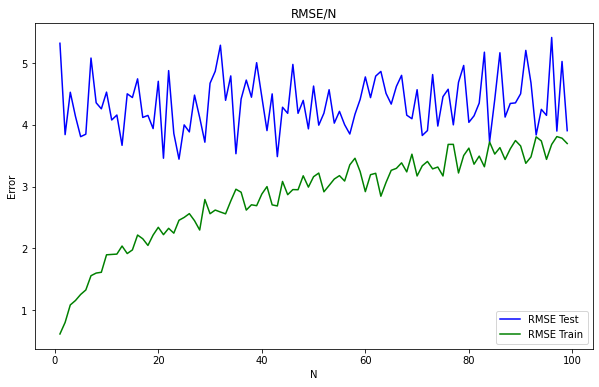

RMSE Test: 3.6792 con N iteraciones = 57
RMSE Train: 3.3433 con N iteraciones = 21


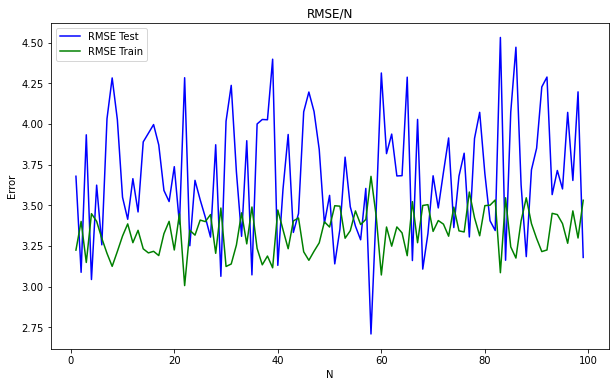

RMSE Test: 3.6485 con N iteraciones = 57
RMSE Train: 2.6864 con N iteraciones = 0


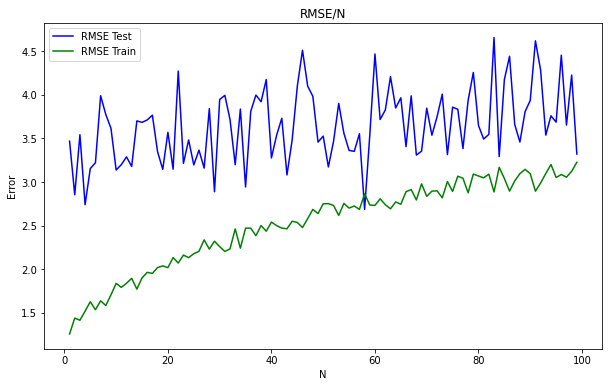

In [7]:
# Iteraciones multiples para ver la evolucion del modelo
rango=100

y_pred_test=[[],[],[]]
y_pred_train=[[],[],[]]
rmse_test=[[],[],[]]
rmse_train=[[],[],[]]
for i in range(1, rango):
    clear_output(wait=True)
    print(f'''Empezando iteración: {i} ...''')
    
    seed = random.randint(0,100)
    
    # Instancia de modelo base
    modelo_base=DecisionTreeRegressor(ccp_alpha=i/100)

    # Instancia del modelo ensemble Bagging
    modelo_bagging=BaggingRegressor(base_estimator=modelo_base, n_estimators=100, max_samples=0.1, random_state=seed)

    # Instancia delo modelo ensemble Boosting
    modelo_boosting=RandomForestRegressor(ccp_alpha=i/100, n_estimators=100, random_state=seed)
    
    # Separacion train y test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
    
    # Agrupación de la columna deseada y ver distribución de los datos
    # class_distribution=y_train.groupby('Class').size()
    # plt.pie(class_distribution, labels=y_train['Class'].unique(), autopct='%1.1f%%', shadow=True)
    # plt.show()
    
    # PipeLine para el tratado de los modelos
    
    # ColumnComposer para el tratado de diferentes columnas del dataframe que despues se unirán en un PipeLine
    numerical_features=['cylinders','displacement','horsepower','weight','acceleration']
    categorical_features=['model-year', 'origin']
    
    numerical_escaler=RobustScaler()
    categorical_transformer=OneHotEncoder(handle_unknown="ignore")

    preprocessor=ColumnTransformer(transformers=[('categorical', categorical_transformer, categorical_features),
                                                ('numerical', numerical_escaler, numerical_features),])
    

    # clf=Pipeline(steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())])

    pipeline_base=Pipeline(steps=[('preprocessor', preprocessor),('modelo', modelo_base)])
    pipeline_bagging=Pipeline(steps=[('preprocessor', preprocessor),('modelo', modelo_bagging)])
    pipeline_boosting=Pipeline(steps=[('preprocessor', preprocessor),('modelo', modelo_boosting)])
    
    # Creación de los modelos
    pipeline_base.fit(X_train, y_train)
    pipeline_bagging.fit(X_train, y_train)
    pipeline_boosting.fit(X_train, y_train)
    # display(pipeline_base[:-1].get_feature_names_out())
    
    # Predicciones de los modelos
    y_pred_test[0]=pipeline_base.predict(X_test)
    y_pred_train[0]=pipeline_base.predict(X_train)
    y_pred_test[1]=pipeline_bagging.predict(X_test)
    y_pred_train[1]=pipeline_bagging.predict(X_train)
    y_pred_test[2]=pipeline_boosting.predict(X_test)
    y_pred_train[2]=pipeline_boosting.predict(X_train)
    
    # Resultado de predicción
    rmse_test[0].append(np.sqrt(mean_squared_error(y_pred_test[0], y_test)))
    rmse_train[0].append(np.sqrt(mean_squared_error(y_pred_train[0], y_train)))
    rmse_test[1].append(np.sqrt(mean_squared_error(y_pred_test[1], y_test)))
    rmse_train[1].append(np.sqrt(mean_squared_error(y_pred_train[1], y_train)))
    rmse_test[2].append(np.sqrt(mean_squared_error(y_pred_test[2], y_test)))
    rmse_train[2].append(np.sqrt(mean_squared_error(y_pred_train[2], y_train)))
    
    
clear_output(wait=True)

# Ploteo de los resultados
for i in range(len(error_rate_test)):
    plt.figure(figsize=(10,6))

    plt.plot(range(1,rango), rmse_test[i], color='blue')
    plt.plot(range(1,rango), rmse_train[i], color='green')

    plt.title('RMSE/N')
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.legend(['RMSE Test', 'RMSE Train'])
    

    print(f'''RMSE Test: {np.median(rmse_test[i]):.4f} con N iteraciones = {rmse_test[i].index(min(rmse_test[i]))}''')
    print(f'''RMSE Train: {np.median(rmse_train[i]):.4f} con N iteraciones = {rmse_train[i].index(min(rmse_train[i]))}''')
    
    plt.show()